**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.



In [41]:
# importing the numpy libray
import numpy as np

In [2]:
# Linear Regression Model Code From Scratch
class LinerRegression:
    # Initaiting the parameters (Learning rate & no. of iterations)
    def __init__(self, learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # Function to Fit the data to the model
    def fit(self,X,Y):
        # number of trainng examples & number of features
        self.m,self.n = X.shape # it the number of rows & columns m=>rows,n=>columns

        # initiating the wights and bias 
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing the gradient descent algorithm
        for i in range(self.no_of_iterations):
            self.update_wights()
    

    def update_wights(self,):
        Y_prediction = self.predict(self.X)
        
        # calculate gradients
        dw = -(2*(self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction)/self.m

        # updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate * db
        
    # function for the prediction  
    def predict(self,X):
        return X.dot(self.w) + self.b

**Using the linear regression model**

In [43]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data Pre-processing**

In [44]:
# loading the data from csv to pandas dataframe
df = pd.read_csv("D:\AI Engineer\Model from Scratch\Data\salary_data.csv")

In [45]:
# printing the first five columns of data
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
# printing the last five columns of data
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [47]:
# numbers of rows and columns in the dataframe
df.shape

(30, 2)

In [48]:
# checking the missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [49]:
# Spliting the feature and target
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [50]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [51]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [52]:
# Spliting the dataset into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 2)

In [53]:
# Trainig the Linear Regression Model
model = LinerRegression(learning_rate = 0.02,no_of_iterations=1000)

In [54]:
model.fit(X_train,Y_train)

In [56]:
# printing the parameter values (weights and bias)
print('weight = ',model.w[0])
print('bias = ',model.b)


weight =  9514.400999035135
bias =  23697.406507136307


In [57]:
# Predicting the salary value for the test data
test_data_prediction = model.predict(X_test)

In [58]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


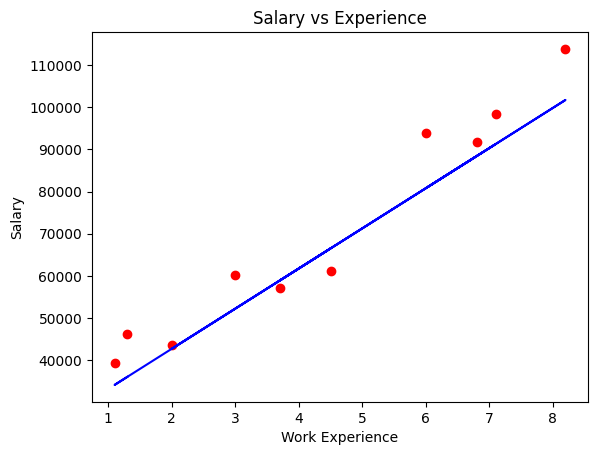

In [62]:
# Visualizing the predicted values & actual values
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()